In [ ]:
import numpy as np
import matplotlib.pyplot as plt

income_data = np.loadtxt(
    './Income1.csv', delimiter=',', usecols=[1, 2],
    skiprows=1
)

percentage_train = 0.80
n_rows = income_data.shape[0]
n_rows_to_train = round(n_rows * percentage_train)
train_data = income_data[:n_rows_to_train] # 24 linhas
test_data = income_data[n_rows_to_train:] # 6 linhas

x_train = train_data[:, [0]]
y_train = train_data[:, [1]]
x_test = test_data[:, [0]]
y_test = test_data[:, [1]]

print(train_data.shape)
print(test_data.shape)

(24, 2)
(6, 2)


In [ ]:
def mse(y_true: list, y_pred: list):
    diffs_sum = 0
    for i in range(0, len(y_true)):
        diff = y_true[i] - y_pred[i]
        diffs_sum += diff ** 2
    return diffs_sum / len(y_true)

def get_weigth_using_matrix_formulation(x, y):
    return np.linalg.inv(x.T @ x) @ x.T @ y

def plot_train_and_test_data(x_train, y_train, x_test, y_test, w=None):
    plt.figure(figsize=(8,8))
    plt.scatter(x_train, y_train, color='blue', label='Treino')
    plt.scatter(x_test, y_test, color='green', label='Teste')

    if (w != None):
        x_line = np.linspace(x_train.min(), x_test.max(), 100)
        y_line = w * x_line
        plt.plot(x_line, y_line.ravel(), color='red', label='Reta ajustada')

    plt.xlabel('Education')
    plt.ylabel('Income')
    plt.title('Educação x Renda')
    plt.legend()
    plt.grid(True)
    plt.show()    

def get_mse_by_weights(x, y_real, weigth):
    y_predict = weigth * x
    mse_calc = mse(y_true=y_real, y_pred=y_predict)
    return mse_calc

def plot_mse_with_highlight(x, y_real, weights, optimized_weight):
    mses = [get_mse_by_weights(x, y_real, w) for w in weights]
    
    plt.figure(figsize=(10, 10))
    plt.plot(weights, mses, marker='o', linestyle='-', color='blue', label='Pesos testados')
    plt.axvline([optimized_weight], color='red', linestyle='-', label=f'Peso otimizado: {optimized_weigth}')
    plt.xlabel('Peso w')
    plt.ylabel('MSE')
    plt.title('Comportamento do MSE para diferentes pesos - Dados de Treino')
    plt.legend()
    plt.grid(True)
    plt.show()

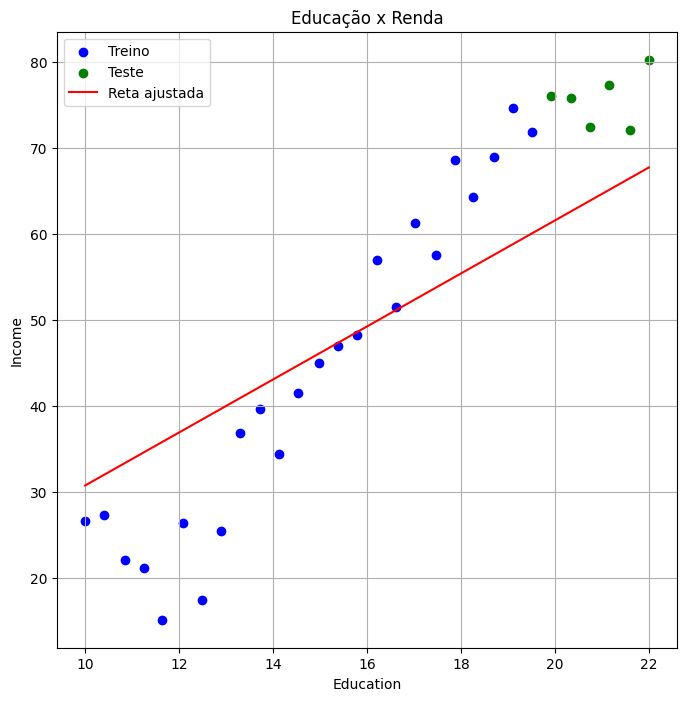

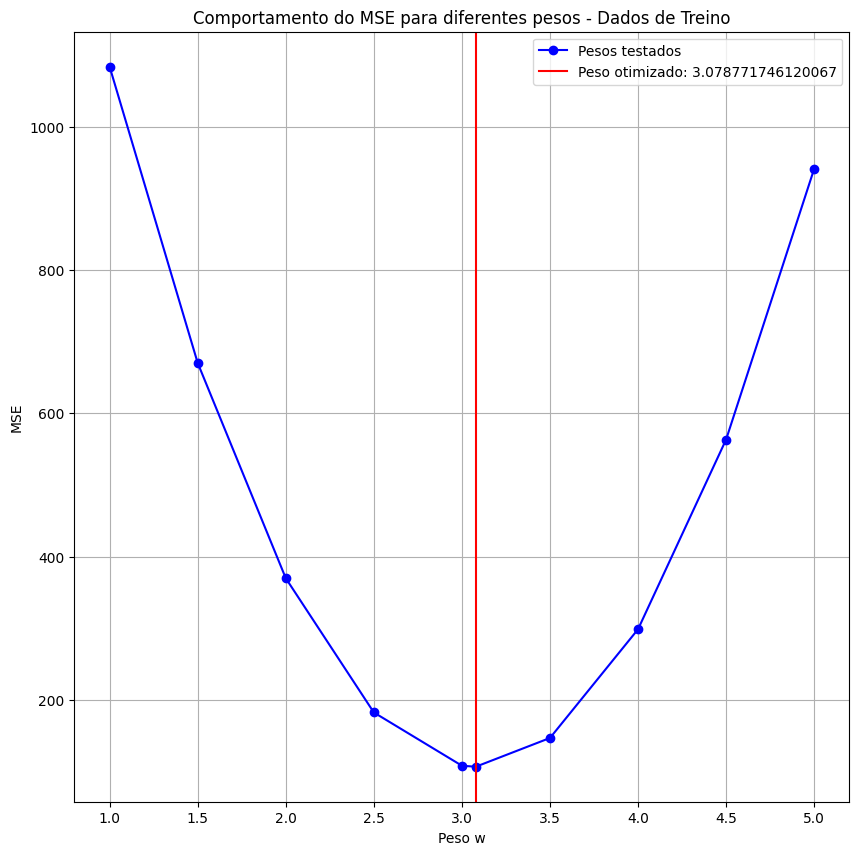

In [ ]:
optimized_weigth = get_weigth_using_matrix_formulation(x=x_train, y=y_train)[0][0]

plot_train_and_test_data(
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    w=optimized_weigth
)

weigths = [1, 1.5, 2, 2.5, 3, optimized_weigth, 3.5, 4, 4.5, 5]

plot_mse_with_highlight(
    x=x_train,
    y_real=y_train,
    weights=weigths,
    optimized_weight=optimized_weigth
)

mse_by_weight = [
    get_mse_by_weights(x=x_train, y_real=y_train, weigth=w)
    for w in weigths
]

mse_test_result = get_mse_by_weights(x=x_test, y_real=y_test, weigth=optimized_weigth)

In [ ]:
print(f'Weight X MSE - Dados de Treino: ')
for i in range(len(mse_by_weight)):
    print(f'Weight: {weigths[i]} -- MSE: {mse_by_weight[i]}')

print('-' * 60)
print(f'Resultados para o peso otimizado nos dados de teste:')
print(f'Peso: {optimized_weigth}')
print(f'MSE: {mse_test_result}')

Weight X MSE - Dados de Treino: 
Weight: 1 -- MSE: [1083.54818173]
Weight: 1.5 -- MSE: [670.16234823]
Weight: 2 -- MSE: [369.79932208]
Weight: 2.5 -- MSE: [182.45910328]
Weight: 3 -- MSE: [108.14169183]
Weight: 3.078771746120067 -- MSE: [106.73908151]
Weight: 3.5 -- MSE: [146.84708774]
Weight: 4 -- MSE: [298.57529099]
Weight: 4.5 -- MSE: [563.32630159]
Weight: 5 -- MSE: [941.10011955]
------------------------------------------------------------
Resultados para o peso otimizado nos dados de teste:
Peso: 3.078771746120067
MSE: [133.67567066]
